In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# [TODO] Define a class which takes system parameters and have a method to generate corresponding graphical objects (Artist) and add them onto given Axes object etc. This class would make the code seems clean make it easy to manage

## Implement update method for animation
- this update method might be used for FuncAnimation

# Define system parameters

In [78]:
num_of_masses = 50
num_of_main_box = 1
num_of_ball = num_of_masses - num_of_main_box

In [79]:
masses = np.ones(num_of_masses) * 0.1
m = masses  # aliasing
#spring_constants = np.ones(num_of_ball) * 1.0
spring_constants = np.random.rand(num_of_ball) * 2.0
k = spring_constants  # aliasing

In [80]:
x_min, x_max = -10, 10
y_min, y_max = 0, 3

box_width = 7

assert box_width < x_max - x_min

box_height = y_max - y_min

In [81]:
ball_radius = box_height / num_of_ball * 0.5

In [82]:
pad_factor = 0.1
data_width = x_max - x_min
pad_width = data_width * pad_factor
data_height = y_max - y_min
pad_height = data_height * pad_factor

x_lim = (x_min - pad_width, x_max + pad_width)
y_lim = (y_min - pad_height, y_max + pad_height)

# Solve ODE

### Initial values

In [83]:
x_box_center_in_box = 0.0
x_box_center_in_rail = 1.0

x_balls_in_box = np.empty(num_of_ball)
x_balls_in_box[:] = (np.random.rand(num_of_ball) - 0.5) * 2.0 * (0.5 * box_width - ball_radius)
x_balls_in_rail = x_balls_in_box + x_box_center_in_rail

In [84]:
initial_vector = [0] * num_of_masses * 2
initial_vector[0::2] = [x_box_center_in_rail, *x_balls_in_box]  # initialize positions
velo_mag = 1.0
initial_vector[1::2] = 2.0 * (np.random.rand(num_of_masses) - 0.5) * velo_mag

In [85]:
from scipy.integrate import ode

In [86]:
def get_dydt(t, y, k, m):
    assert len(y) % 2 == 0
    assert len(y) >= 4
    #print('k: {0} / tf: {1}'.format(k, isinstance(k, np.ndarray)))
    dydt = [0] * len(y)  # initialization
    x_balls_in_box = np.array(y[2::2])
    assert isinstance(k, np.ndarray)
    assert isinstance(m, np.ndarray)
    assert len(k) == len(x_balls_in_box)
    assert len(k) == len(m) - 1
    ma0 = (x_balls_in_box * k).sum()
    dydt[0::2] = y[1::2]  # diff of no dot == single dot
    dydt[1] = ma0 / m[0]
    #print("dd",(k * x_balls_in_box - ma0) / m[1:])
    dydt[3::2] = - (k * x_balls_in_box + ma0) / m[1:]
    return dydt

fargs = (k,m)

In [87]:
get_dydt(1, initial_vector, k, m)

[0.6006683391580376,
 -10.990991917103985,
 -0.18427187285703583,
 19.035529712885264,
 -0.3461613502408969,
 9.916833916650306,
 0.8798561023820988,
 14.064902035692093,
 -0.6541957333620811,
 48.614961967936736,
 0.43190175551080445,
 9.111954173757752,
 0.7037973731011218,
 -33.47815965348014,
 -0.8565135624808762,
 -14.869130944062231,
 -0.021223828468169614,
 14.267036061148232,
 -0.17612131953346633,
 14.093010110208786,
 0.9128937839065658,
 41.95190405167738,
 0.03962063454248188,
 -3.429655888887506,
 -0.3883848306614299,
 -3.68150429908243,
 -0.26983617857479225,
 6.3968144805157445,
 -0.1027148666581319,
 17.598095201980016,
 -0.28565833195349644,
 -33.953206262316264,
 0.2820432368754062,
 -0.8803225343880383,
 -0.17972914245711613,
 10.749203566613295,
 -0.47208354436615774,
 32.08424640271494,
 -0.7459166607232768,
 3.60655948673393,
 0.8695142898117161,
 10.43984259842791,
 -0.34326420372231836,
 -26.879864106365318,
 0.5087256548439469,
 11.12928201448975,
 0.5464693535

In [88]:
solver = ode(get_dydt)

solver.set_integrator('dopri5', nsteps=10000)

solver.set_f_params(*fargs)

solver.set_initial_value(initial_vector)

sol = []
solver.set_solout(lambda t, y: sol.append((t,*y)))

In [89]:
solver.integrate(100)

array([ 6.73121341e+01, -1.99591016e-01,  6.59966526e-01, -3.26265489e+00,
        1.68443055e+00,  1.37054113e+00,  2.35704612e+00,  2.99171055e+00,
       -2.89371244e-01, -3.00918160e+00, -1.12321271e+00,  1.61557214e+00,
       -1.05330236e+00,  1.05871273e+01, -9.57217154e-01,  3.28238577e+00,
       -1.50335076e+00,  8.52042541e-01,  2.29534819e+00,  1.28106298e+00,
       -5.77058901e-01, -4.30782331e+00, -5.94354864e-01,  1.29189381e+00,
       -1.08021209e+00,  1.43490186e+00, -2.89565637e+00,  5.80599620e-01,
        1.13505428e+00,  2.20462228e+00, -7.41109865e-01,  1.33881674e+01,
       -3.94771717e-01,  3.89845192e+00, -5.72843341e-01,  1.53835216e+00,
       -2.01871853e-01, -3.40432274e+00, -1.67386744e+00, -2.39670540e+00,
        2.24971208e+00,  7.71382707e-01,  1.39980300e+00, -3.82890760e+00,
        1.93828181e-01,  1.74493965e+00,  7.55811783e-01, -1.00176454e+01,
       -3.15519163e+00, -3.13673334e+00, -1.06535317e+00,  1.12959387e+00,
        1.48198829e+00, -

In [90]:
sol_2d = np.array(sol)

In [91]:
sol_2d.shape

(8847, 101)

In [92]:
t = np.empty((len(sol),), dtype=float)
x_box_in_rail_t = np.empty((len(sol),), dtype=float)
v_box_in_rail_t = np.empty((len(sol),), dtype=float)
x_balls_in_box_t = np.empty((len(sol),num_of_ball), dtype=float)
v_balls_in_box_t = np.empty((len(sol),num_of_ball), dtype=float)

for idx, ydata in enumerate(zip(*sol)):
    if idx == 0: t[:] = ydata
    elif idx == 1: x_box_in_rail_t[:] = ydata
    elif idx == 2: v_box_in_rail_t[:] = ydata
    elif idx % 2 == 1: x_balls_in_box_t[:,(idx - 3) // 2] = ydata
    elif idx % 2 == 0: v_balls_in_box_t[:,(idx - 3) // 2] = ydata
    else: raise IndexError("Unexpected index: {0}".format(idx))

In [93]:
x_balls_in_rail_t = np.empty_like(x_balls_in_box_t)
for idx in range(num_of_ball):
    x_balls_in_rail_t[:,idx] = x_box_in_rail_t + x_balls_in_box_t[:,idx]

In [94]:
x_balls_in_rail_t

array([[-1.12976500e-01,  2.66486922e+00, -2.35016049e+00, ...,
        -1.89749095e+00, -8.25066552e-01, -5.98665010e-02],
       [-1.11192166e-01,  2.66590895e+00, -2.34403302e+00, ...,
        -1.89109563e+00, -8.18479297e-01, -5.75734016e-02],
       [-1.08778906e-01,  2.66717830e+00, -2.33632921e+00, ...,
        -1.88257333e+00, -8.09501619e-01, -5.42365100e-02],
       ...,
       [ 6.80295366e+01,  6.89767534e+01,  6.96220014e+01, ...,
         6.68495637e+01,  6.73783723e+01,  6.73106680e+01],
       [ 6.79862065e+01,  6.89917713e+01,  6.96577542e+01, ...,
         6.67246023e+01,  6.73399657e+01,  6.72672305e+01],
       [ 6.79721006e+01,  6.89965646e+01,  6.96691802e+01, ...,
         6.66845657e+01,  6.73275910e+01,  6.72532831e+01]])

In [95]:
x_in_rail_t = np.empty((len(t), num_of_masses))
x_in_rail_t[:,0] = x_box_in_rail_t
x_in_rail_t[:,1:] = x_balls_in_rail_t

In [96]:
M = m.sum()

In [97]:
cm_in_rail_t = 1.0 / M * np.apply_along_axis(lambda x: m.dot(x), 1, x_in_rail_t)

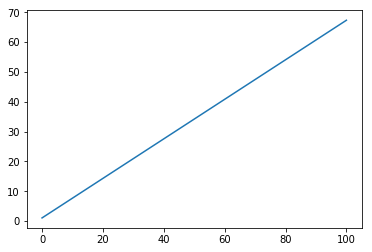

In [98]:
plt.plot(t,cm_in_rail_t)

In [99]:
x_in_cm_t = np.empty_like(x_in_rail_t) 
for idx in range(num_of_masses):
    x_in_cm_t[:,idx] = x_in_rail_t[:,idx] - cm_in_rail_t

Text(0,0.5,'amplitude')

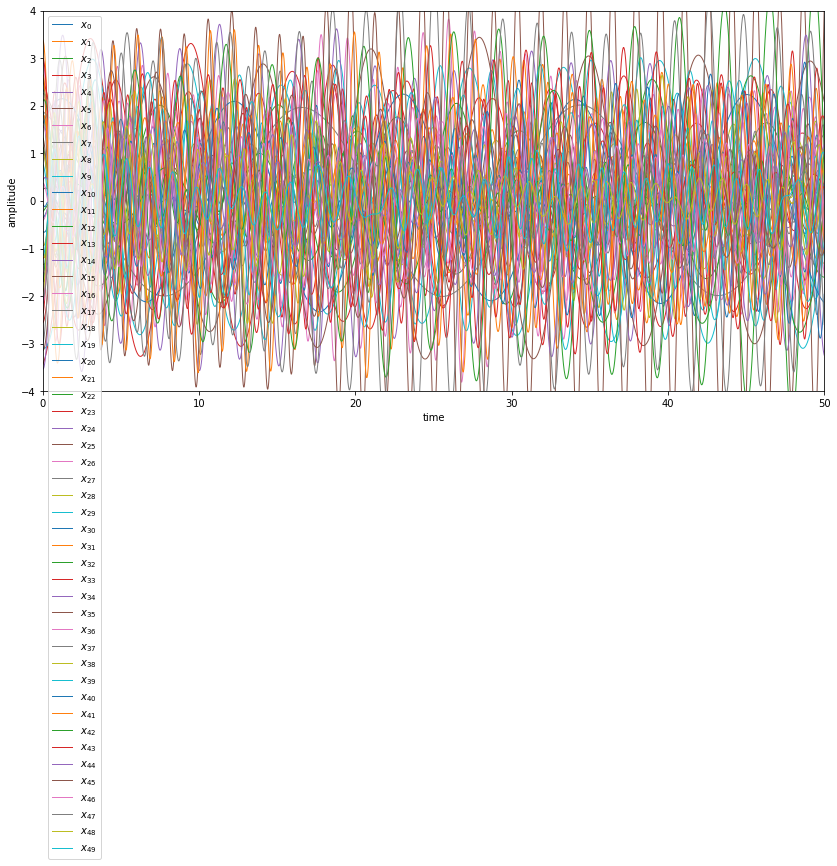

In [100]:
figg, axx = plt.subplots(figsize=(14,7))
# t = None
# for idx, ydata in enumerate(zip(*sol)):
#     if idx == 0:
#         t = ydata
#         continue
#     if idx % 2 == 0: continue
#     if idx <= 2: continue
#     axx.plot(t,ydata, label='$x_{{{0}}}$'.format((idx // 2)), linewidth=1.0)
for idx in range(num_of_masses):
    axx.plot(t, x_in_cm_t[:,idx], label='$x_{{{0}}}$'.format(idx), linewidth=1.0)
axx.legend()
#axx.set_ylim(*x_lim)
axx.set_ylim(-4,4)
axx.set_xlim(0,50)

axx.set_xlabel('time')
axx.set_ylabel('amplitude')

In [15]:
#figg.savefig('doesnt seem to synchronize 02.png')

# Construct Artist objects

### Bounding lines

In [16]:
from matplotlib.lines import Line2D

In [17]:
bounding_line_kwargs = {'color':'black'}
lower_line = Line2D([x_min, x_max], [y_min, y_min], **bounding_line_kwargs)
upper_line = Line2D([x_min, x_max], [y_max, y_max], **bounding_line_kwargs)

lines = [lower_line, upper_line]

### Main box

In [18]:
from matplotlib.patches import Rectangle

In [19]:
lower_left_xy_coord = (x_box_center_in_rail - box_width * 0.5, y_min)
main_box = Rectangle(lower_left_xy_coord, box_width, box_height, facecolor='white', edgecolor='black')

### Balls

In [20]:
from matplotlib.patches import Circle

In [21]:
y_balls_in_rail = np.arange(num_of_ball) * ball_radius * 2.0 + ball_radius

circle_centers = zip(x_balls_in_rail, y_balls_in_rail)

In [22]:
circle_properties = {'facecolor':'white', 'edgecolor':'black'}
circles = []
for center_xy in circle_centers:
    cir = Circle(center_xy, radius=ball_radius, **circle_properties)
    circles.append(cir)

### Stairs

In [23]:
stairs = []

if num_of_ball > 1:
    stair_height = ball_radius * 2.0
    y_stairs = np.arange(num_of_ball - 1) * stair_height + stair_height
    x_data = [x_box_center_in_rail - box_width * 0.5, x_box_center_in_rail + box_width * 0.5]
    for y_value in y_stairs:
        line = Line2D(x_data, [y_value, y_value], color='black')
        stairs.append(line)

# Draw Artist objects

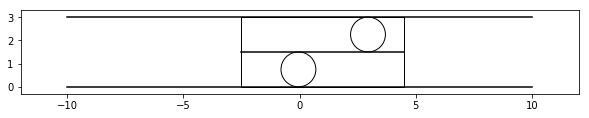

In [24]:
fig, ax = plt.subplots(figsize=(10,7))

ax.axis('square')
ax.set_xlim(*x_lim)
ax.set_ylim(*y_lim)

for line in lines: ax.add_line(line)

ax.add_patch(main_box)
for circle in circles: ax.add_patch(circle)

for line in stairs: ax.add_line(line)

In [25]:
#fig.savefig('graffiti-of-system.png')